In [4]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [5]:
#import data
data = pd.read_csv("/content/EastWestAirlines.csv")
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


## EDA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
data1=data.drop(['ID#'],axis=1)
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [8]:
# normalizing the data
data2 = pd.DataFrame(normalize(data1),columns=data1.columns)
data2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


## **Fitting Hierarchical cluster**


### Dendrogram

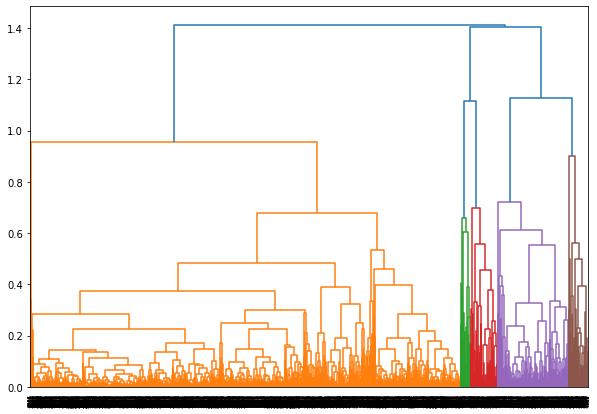

In [ ]:
#Creating dendrogram fo find the optimal no of clusters
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(data2,'complete'))

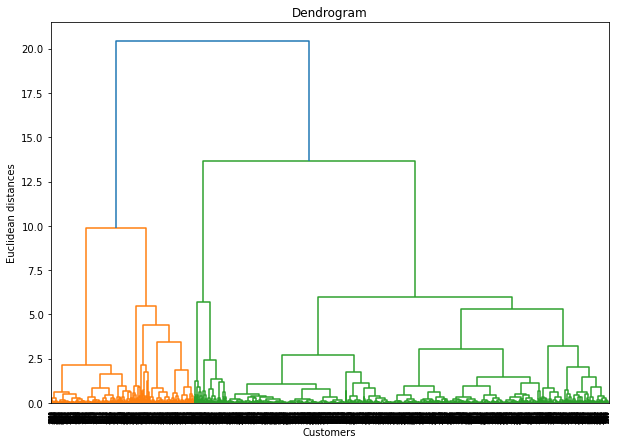

In [ ]:
plt.figure(figsize=(10, 7)) 
dendrogram = sch.dendrogram(sch.linkage(data2, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

### Predict cluster in dataset

In [ ]:
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hc

AgglomerativeClustering(n_clusters=5)

In [ ]:
y=pd.DataFrame(hc.fit_predict(data2),columns=['clustersid'])
y.value_counts()

clustersid
2             1547
4             1191
3              579
1              453
0              229
dtype: int64

In [ ]:
#Add cluster to dataset
data1['clusterid'] = hc.labels_
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,4
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,64385,0,1,1,1,981,5,0,0,1395,1,4
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


### Visualizing the cluster

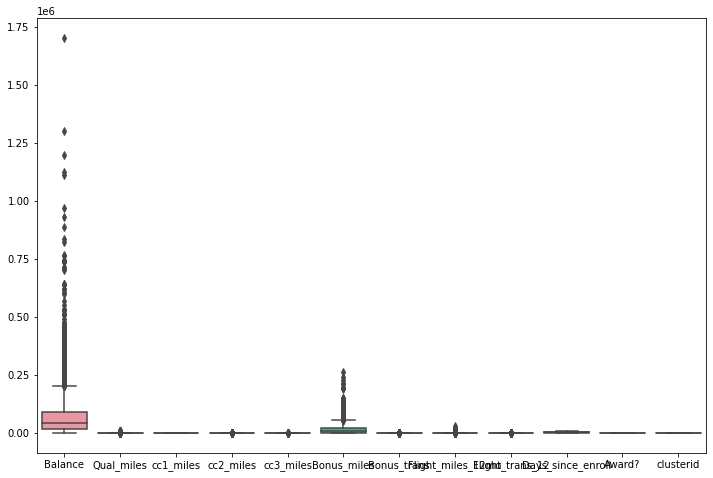

In [ ]:
import seaborn as sns 
plt.figure(figsize=(12,8))
sns.boxplot(data=data1)

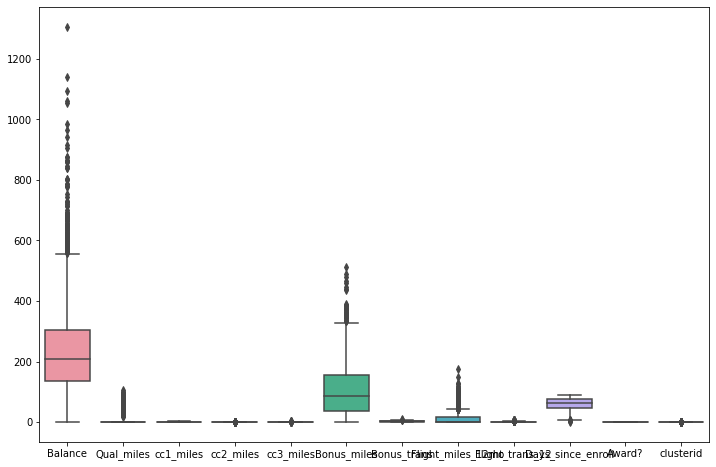

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(data1))

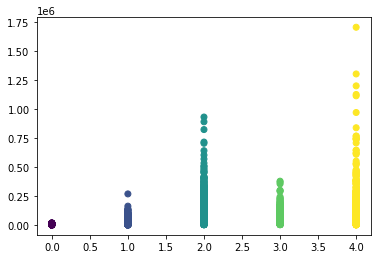

In [ ]:
plt.scatter(data1['clusterid'],data1['Balance'],c=hc.labels_)

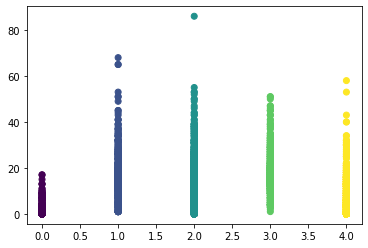

In [ ]:
plt.scatter(data1['clusterid'],data1['Bonus_trans'],c=hc.labels_)

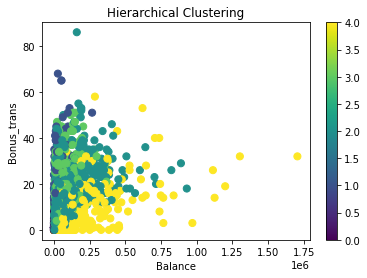

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data1['Balance'],data1['Bonus_trans'],
                     c=data1.clusterid ,s=50)
ax.set_title('Hierarchical Clustering')
ax.set_xlabel('Balance')
ax.set_ylabel('Bonus_trans')
plt.colorbar(scatter)

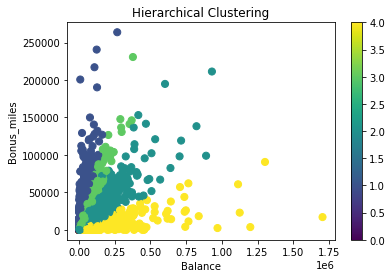

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data1['Balance'],data1['Bonus_miles'],
                     c=data1.clusterid ,s=50)
ax.set_title('Hierarchical Clustering')
ax.set_xlabel('Balance')
ax.set_ylabel('Bonus_miles')
plt.colorbar(scatter)

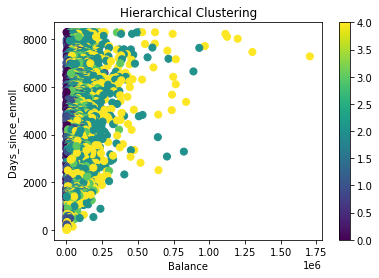

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data1['Balance'],data1['Days_since_enroll'],
                     c=data1.clusterid ,s=50)
ax.set_title('Hierarchical Clustering')
ax.set_xlabel('Balance')
ax.set_ylabel('Days_since_enroll')
plt.colorbar(scatter)

In [ ]:
# Visualising the clusters
# this code is not working - Doubt
plt.scatter(data2[hc == 0, 0], data2[hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data2[hc == 1, 0], data2[hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data2[hc == 2, 0], data2[hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data2[hc == 3, 0], data2[hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(data2[hc == 4, 0], data2[hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.legend()
plt.show()

## **Fitting KMeans cluster**

In [15]:
#Normalize heterogeneous data by using Standard Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
datakm1 = StandardScaler().fit_transform(data1)
datakm1

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [ ]:
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change. 

In [ ]:
#Within cluster sum-of-square criterion
wcss=[]
for i in range (1,11):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(datakm1)
  wcss.append(kmeans.inertia_)

### Elbow plot

Text(0, 0.5, 'WCSS')

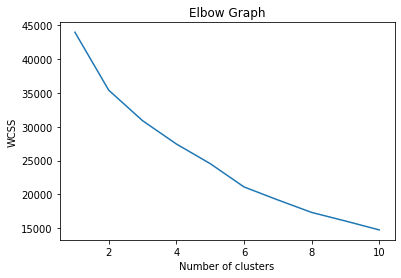

In [ ]:
#Creating elbow plot fo find the optimal no of clusters
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
#KMeans algorithm k=4
cluster4km = KMeans(n_clusters=4, init='k-means++', max_iter= 300, n_init= 10, random_state=20).fit(datakm1)
cluster4km

In [ ]:
cluster4km.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

### Predict cluster in dataset

In [ ]:
#add cluster to dataset
datakm2 = data1.copy()
datakm2['clusters4id'] = cluster4km.labels_
datakm2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters4id
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [ ]:
y=pd.DataFrame(cluster4km.fit_predict(datakm2),columns=['clusters4id'])
y.value_counts()

clusters4id
0              2800
3               988
1               185
2                26
dtype: int64

In [ ]:
#Group data by Clusters (K=4)
datakm2.groupby('clusters4id').agg(['mean']).reset_index()

,clusters4id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,43793.917814,97.436886,1.221785,1.019269,1.000393,4700.690916,6.918993,198.621707,0.618168,3691.559969,0.201337
1,1,116817.336214,154.756481,3.701493,1.002357,1.001571,39216.199529,18.759623,334.355852,0.997643,4893.491752,0.648075
2,2,191573.726190,775.863095,2.172619,1.035714,1.000000,31412.160714,26.779762,5365.672619,15.636905,4665.827381,0.809524
3,3,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


### Visualization

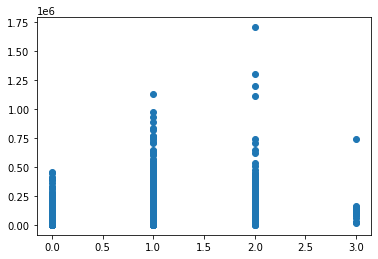

In [ ]:
plt.scatter(datakm2['clusters4id'], datakm2['Balance'])

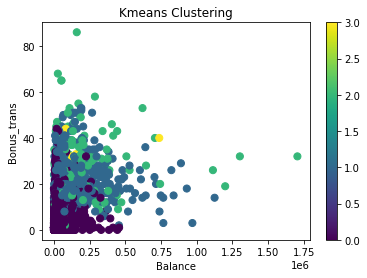

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data1['Balance'],data1['Bonus_trans'],
                     c=datakm2.clusters4id ,s=50)
ax.set_title('Kmeans Clustering')
ax.set_xlabel('Balance')
ax.set_ylabel('Bonus_trans')
plt.colorbar(scatter)

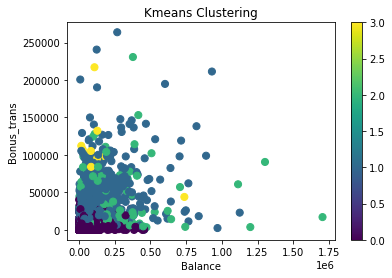

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data1['Balance'],data1['Bonus_miles'],
                     c=datakm2.clusters4id ,s=50)
ax.set_title('Kmeans Clustering')
ax.set_xlabel('Balance')
ax.set_ylabel('Bonus_trans')
plt.colorbar(scatter)

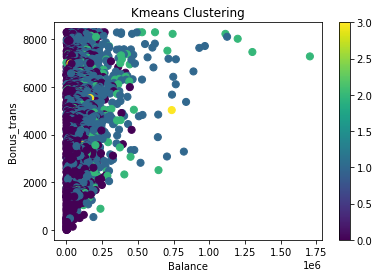

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data1['Balance'],data1['Days_since_enroll'],
                     c=datakm2.clusters4id ,s=50)
ax.set_title('Kmeans Clustering')
ax.set_xlabel('Balance')
ax.set_ylabel('Bonus_trans')
plt.colorbar(scatter)

## **DBSCAN**

In [101]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
data_db = sc.fit_transform(data1)
data_db

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [103]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples = 5)
dbscan.fit(data_db)

DBSCAN(eps=0.8)

In [104]:
#Noisy samples are given the label -1
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [105]:
from sklearn.metrics import silhouette_score
silhouette_score(data2,dbscan.labels_)

-0.4265031727648339

In [82]:
dbscan = DBSCAN(eps=6.8, min_samples = 6)
dbscan.fit_predict(data_db)
silhouette_score(data2,dbscan.labels_)

0.31092191240248074

In [106]:
#Adding cluster to the dataset
cl = pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,1
3997,0


In [107]:
clustered = pd.concat([data2,cl],axis=1)
clustered

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000,0
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000,0
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000,0
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000,0
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049,1
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016,1
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013,1
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000,0


### Visualization

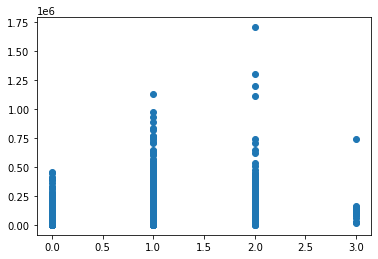

In [ ]:
plt.scatter(datakm2['clusters4id'], datakm2['Balance'])

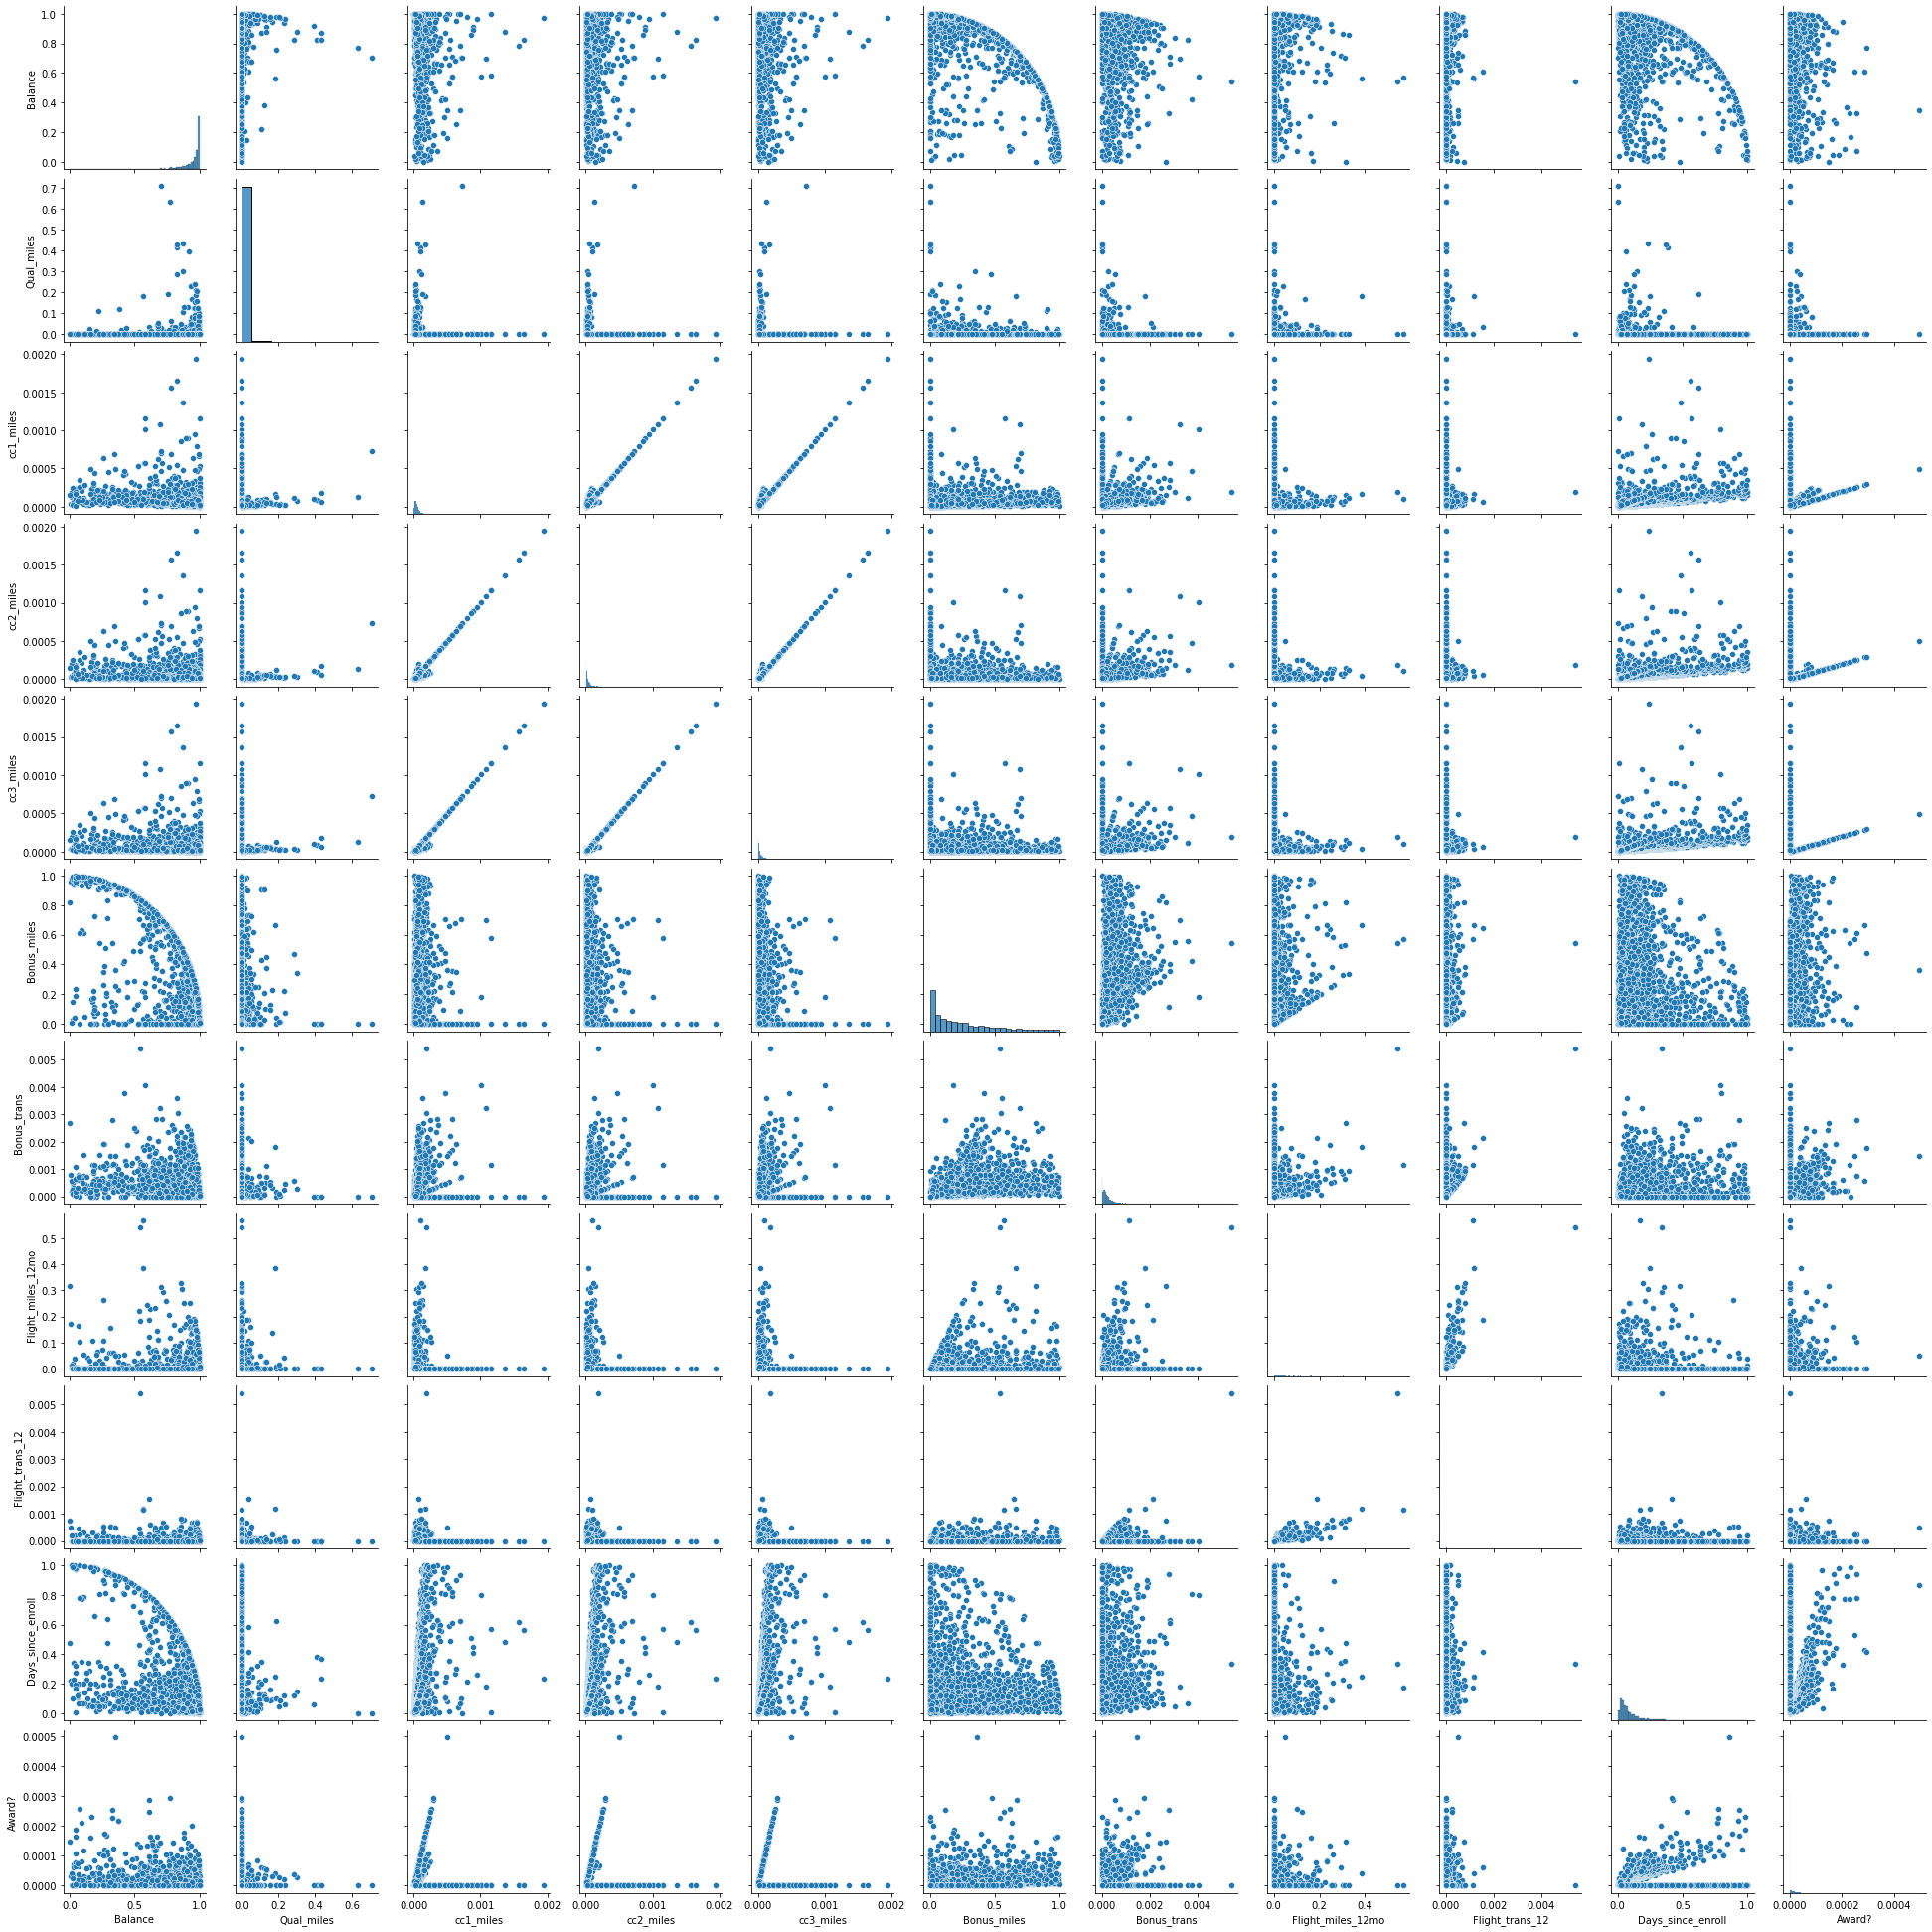

In [87]:
import seaborn as sns
sns.pairplot(data2)